In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/groceries/EDA


   product_type web-scraper-order  \
0         flour      1698753392-1   
1         flour      1698753392-2   
2         flour      1698753392-3   
3         flour      1698753392-4   
4         flour      1698753392-5   
..          ...               ...   
62        flour     1698741806-33   
63        flour     1698741806-34   
64        flour     1698741806-42   
65        flour     1698741806-43   
66        flour     1698741806-44   

                                web-scraper-start-url  \
0   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
1   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
2   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
3   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
4   https://www.aldi-now.ch/de/vorr%C3%A4te/backar...   
..                                                ...   
62         https://www.migros.ch/de/search?query=Mehl   
63         https://www.migros.ch/de/search?query=Mehl   
64         https://www.migros.ch/de/search

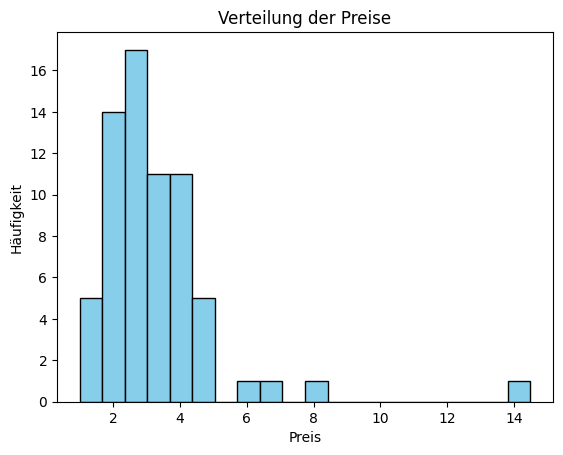

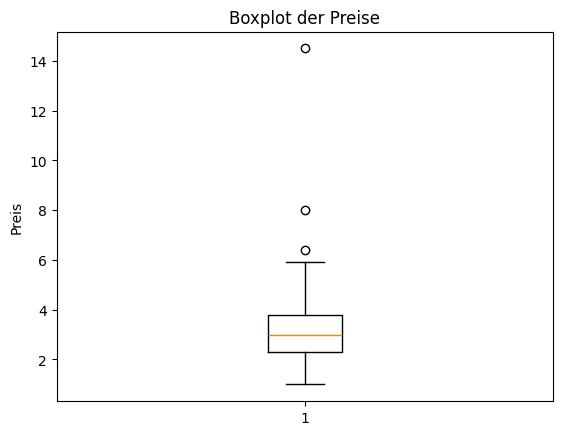

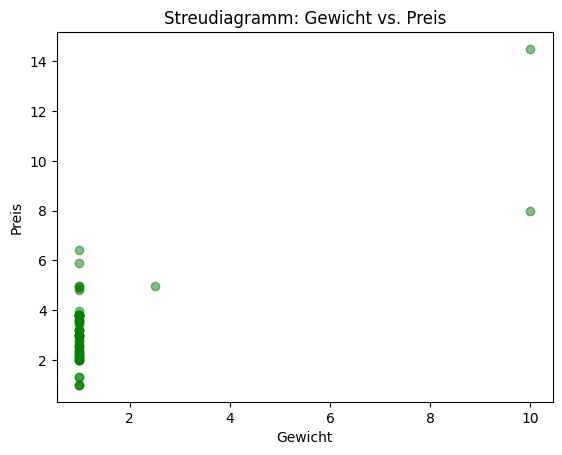

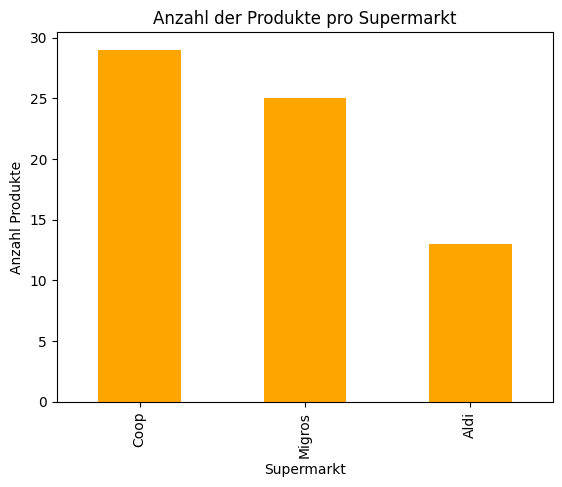

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Verbindung zur SQLite-Datenbank herstellen (Pfad zur Datenbank anpassen)
conn = sqlite3.connect('../groceries_database.db')  # Der Pfad '../' geht eine Ebene nach oben, wenn dein Notebook in /EDA/ liegt.

# Query the SQL-table for butter_table (all records)
cursor = conn.cursor()
cursor.execute('''SELECT *
               FROM flour_table''')

# Überprüfe, ob es Ergebnisse gibt
if cursor.description is not None:
    # Spaltennamen extrahieren
    columns = [description[0] for description in cursor.description]

    # DataFrame erstellen
    df_all = pd.DataFrame(cursor.fetchall(), columns=columns)

    # DataFrame anzeigen
    print(df_all)
else:
    print("Die Abfrage hat keine Ergebnisse zurückgegeben.")

# Histogramm
plt.hist(df_all['price_raw'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Preise')
plt.show()

# Boxplot
plt.boxplot(df_all['price_raw'])
plt.ylabel('Preis')
plt.title('Boxplot der Preise')
plt.show()

# Streudiagramm
plt.scatter(df_all['weight_raw'], df_all['price_raw'], alpha=0.5, color='green')
plt.xlabel('Gewicht')
plt.ylabel('Preis')
plt.title('Streudiagramm: Gewicht vs. Preis')
plt.show()

# Balkendiagramm
df_all['Supermarkt'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Supermarkt')
plt.ylabel('Anzahl Produkte')
plt.title('Anzahl der Produkte pro Supermarkt')
plt.show()
